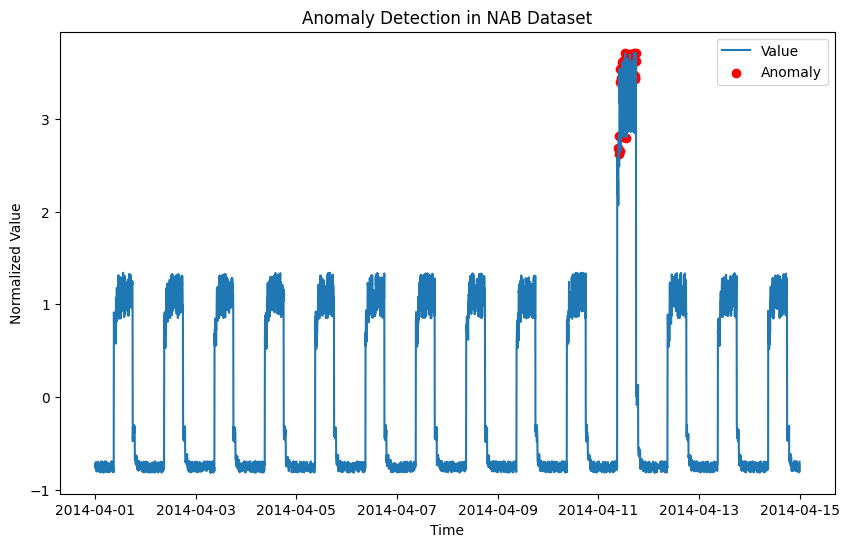

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the dataset
data = pd.read_csv('C:\\Users\\maiqu\\Desktop\\Killian\\Research\\Datasets\\nab_art_daily_jumpsup.csv')

# Preprocess the data
# Assuming the dataset has a 'value' column and a 'timestamp' column
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Normalize the data
data['value'] = (data['value'] - data['value'].mean()) / data['value'].std()

# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.01)
data['anomaly'] = model.fit_predict(data[['value']])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], label='Value')
anomalies = data[data['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['value'], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.title('Anomaly Detection in NAB Dataset')
plt.legend()
plt.show()